# Worldwide COVID-19 Spread and Economic Indicators
## DS 2500: Intermediate Programming with Data
### By: Robert Hyland, Omeed Golkaryeh, Jonathan Volfson, and Rikin Kamdar

## Introduction

The COVID-19 pandemic has ravaged the world in unprecedented ways. The rapid onset of the pandemic and ease of transmission placed countries in a difficult position, wherein responses had to be swift and widespread. Over a year into the pandemic, and with vaccinations happening every day, it is important to reflect on the development of the pandemic and the ways in which it has impacted people across the world. 

The purpose of this project is to implement visualizations to better understand the impact of COVID-19 globally. By using data sources that cover a variety of measures from COVID deaths to vaccination rates, we hope to gain a better understanding of the impact of COVID. After generating visualizations related to the pandemic, we aim to integrate certain economic measures to see if they're related individual countries' responses to the pandemic. Economic prosperity is often viewed as a measure of a country's health, and as such this project aims to see if measures of economic prosperity (and, conversely, economic inequality) can adequately account for the impact of COVID, as well as the efficacy of country responses. 

## Utilizing Geopandas to Visualize the Impact of Covid

For this section, Geopandas is utilized to generate a series of visualizations that display the total deaths per million in a country. The function make_map utilizes geopandas to create visualizations in a series of steps. First, the dataframe is sliced to only contain the specified date. The dataframe is then merged with a geopandas world dataframe according to country codes. Geopandas then has a visualization function where the specified column can be used to color individual countries on a map.

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url)
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.rename(columns={'iso_code': 'iso_a3'})
data

,iso_a3,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82984,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82985,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82986,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82987,ZWE,Africa,Zimbabwe,2021-04-19,37859.0,108.0,78.857,1553.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


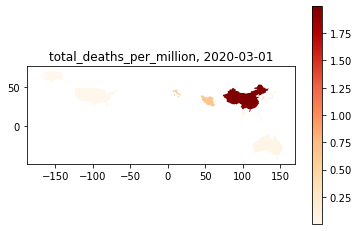

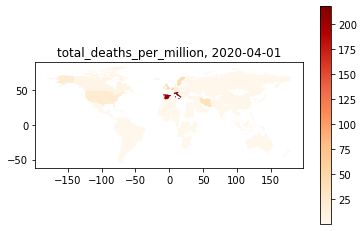

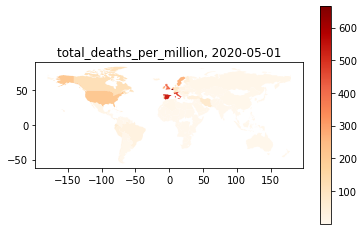

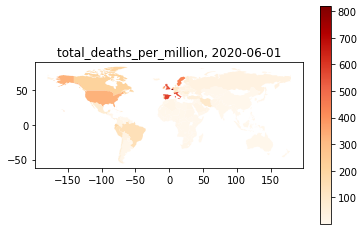

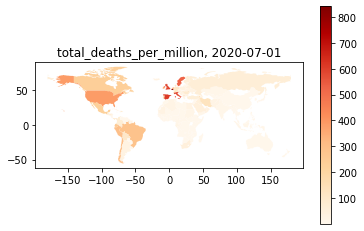

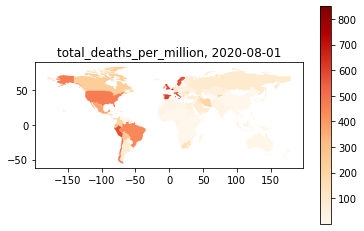

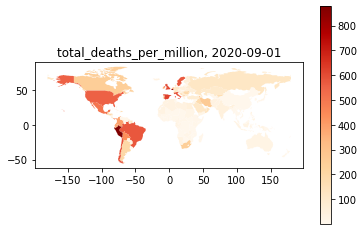

In [4]:
def make_map(data, date, parameter):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    subdata = data[(data.date == date)]
    new_df = pd.merge(world, subdata, on='iso_a3')
    new_df.plot(column = parameter, legend=True, cmap='OrRd')
    plt.title(f'{parameter}, {date}')
    plt.savefig(f'{date}.png')
dates1 = ['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01']
dates2 = ['2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01']
for date in dates1:
    make_map(data, date, 'total_deaths_per_million')

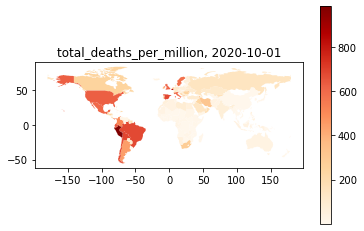

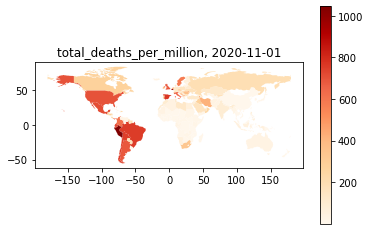

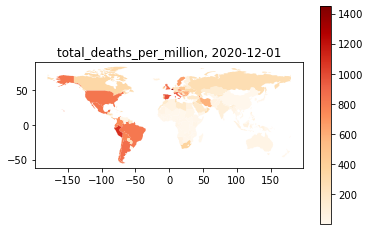

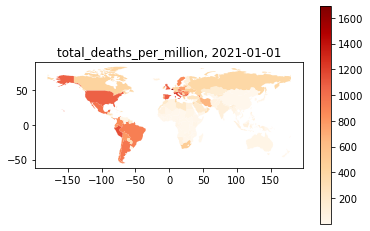

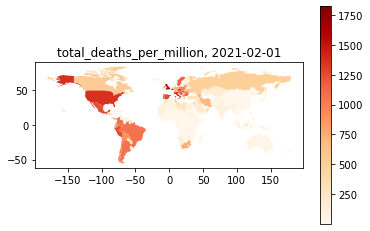

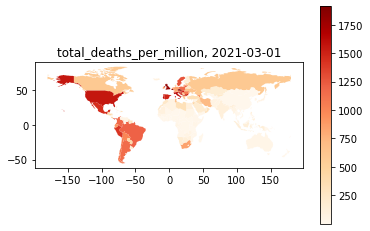

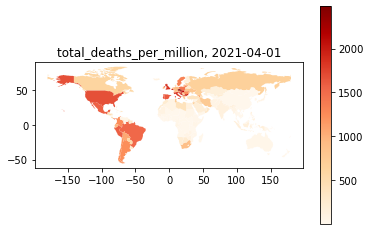

In [5]:
for date in dates2:
    make_map(data, date, 'total_deaths_per_million')

## Turning Geopandas Visualizations into Gifs:
Converting the above visualizations into a single gif. Note: this was done using a terminal command prompt that [can be found here.](https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8)

![SegmentLocal](map3.gif "segment")

## Identifying Relationships Between COVID and Economic Inequality

The following visualizations aim to elucidate any relationships that exist between the impact of COVID and existing levels of economic inequality across the globe. The following code combines two dataframes, the one used above that outlines COVID statistics, and a secondary dataframe that incorporates the Gini Index. The Gini Index is a measure used to quantify economic inequality in a country. Measured from 0-100, the closer a country's Gini Index is to 100, the more unequal the distribution of wealth is. The hope is to identify any correlation between the gini coefficient and any measures of COVID impact or preparedness within a country. 

In [69]:
econdf = pd.read_csv('https://raw.githubusercontent.com/jonvolfson/DS2500Project/main/econ_indicators.csv')
econdf.columns = ['year', 'year_code', 'country', 'iso_a3', 'gini', 'btm10_income', 'population']
econdf.drop(columns=['population'])
# keeping only the year with the most values for gini index
econdf = econdf[(econdf.year == '2016') & (econdf.gini != '..')]
econdf['gini'] = econdf['gini'].astype(float)
# creating a sub-dataframe for April 1, 2021
subdf = data[(data.date == '2021-04-01')]
mergedf = pd.merge(econdf, subdf, on='iso_a3')
mergedf

,year,year_code,country,iso_a3,gini,btm10_income,population_x,continent,location,date,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2016,YR2016,Albania,ALB,33.7,3,2876101,Europe,Albania,2021-04-01,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1,2016,YR2016,Argentina,ARG,42.0,1.8,43590368,South America,Argentina,2021-04-01,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
2,2016,YR2016,Armenia,ARM,32.5,3.3,2936146,Asia,Armenia,2021-04-01,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
3,2016,YR2016,Austria,AUT,30.8,2.8,8736668,Europe,Austria,2021-04-01,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.922
4,2016,YR2016,Bangladesh,BGD,32.4,3.7,157970840,Asia,Bangladesh,2021-04-01,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2016,YR2016,United Kingdom,GBR,34.8,2.8,65611593,Europe,United Kingdom,2021-04-01,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
76,2016,YR2016,United States,USA,41.1,1.8,322941311,North America,United States,2021-04-01,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
77,2016,YR2016,Uruguay,URY,39.7,2.2,3424132,South America,Uruguay,2021-04-01,...,20551.409,0.1,160.708,6.93,14.0,19.9,NaN,2.80,77.91,0.817
78,2016,YR2016,Vietnam,VNM,35.3,2.6,93638724,Asia,Vietnam,2021-04-01,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704


### Visualization One: Relating Percentage Vaccinated to GDP Per Capita
The first visualization relating COVID and economic data below aims to see if more "economically prosperous" countries--that is, countries with a higher GDP per capita--are vaccinating their populations at a higher rate. As indicated by the visualization below, there is a weak correlation between the two. The size of the points represents the size of the population to scaled down, indicating that high-population, high GDP per capita countries are to some extent vaccinating their populations at higher rates. 

Text(0, 0, 'Correlation: 0.33522943316380205')

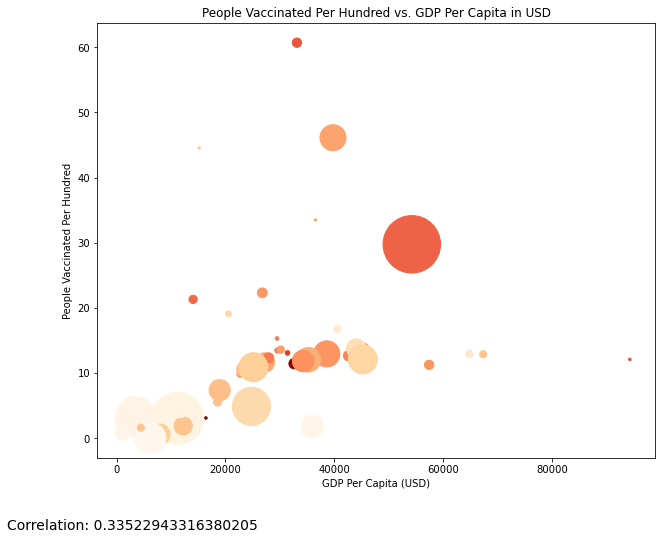

In [78]:
plt.figure(figsize=(10,8))
plt.scatter(mergedf['gdp_per_capita'], mergedf['people_vaccinated_per_hundred'], s=(mergedf['population_y']/100000), c=(mergedf['total_cases_per_million']), cmap='OrRd')
plt.title('People Vaccinated Per Hundred vs. GDP Per Capita in USD')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('People Vaccinated Per Hundred')
corr = mergedf.corr()['gdp_per_capita']['people_vaccinated_per_hundred']
plt.figtext(0, 0, f'Correlation: {corr}', fontsize=14)

### Visualization Two: Comparing the Human Development Index and Total Cases Per Million
The results in this visualization were unexpected. The Human Development Index (HDI) is traditionally viewed as a measure of the potential and prosperity of a population, taking into consideration measures such as education, poverty, and healthcare. One would reasonably expect countries with higher Human Development Index values to perform better in light of the pandemic, though the data suggests otherwise. There is a considerable correlation of approximately .569 between the Human Development Index and total cases per million, suggesting that countries traditionally viewed as more prosperous are in fact performing more poorly during the pandemic.

Before making any major conclusions in this regard, it is important to note that this could likely be explained by a lack of data. Total cases per million is derived from local government reports, which often lag, and could be concealed for the sake of hiding actual the actual tolls of the pandemic. 

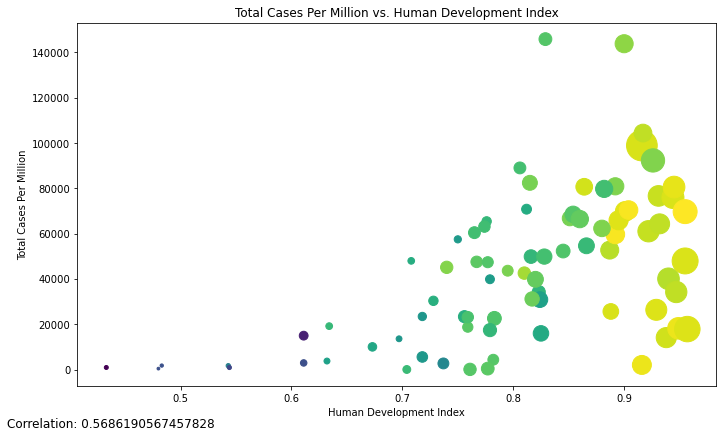

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(mergedf.human_development_index, mergedf.total_cases_per_million, s=(mergedf.gdp_per_capita/100), c=(mergedf.life_expectancy))
plt.title('Total Cases Per Million vs. Human Development Index')
plt.xlabel('Human Development Index')
plt.ylabel('Total Cases Per Million')
corr = mergedf.corr()['human_development_index']['total_cases_per_million']
plt.figtext(0, 0, f'Correlation: {corr}', fontsize=12)
plt.tight_layout()

### Visualization Three: Comparing Economic Inequality and Pandemic Preparedness
This visualization aims to see if the gini coefficient can be an adequate predictor of pandemic preparedness. For this visualization, pandemic preparedness is defined as hospital beds per thousand people within a country. As the data shows, there is a negative correlation between the two variables, indicating that as economic (or wealth) inequality increases, the number of hospital beds per thousand decreases. While causality cannot be inferred, it is intuitive that countries with high levels of economic inequality are less equipped in terms of resources to adequately provide care for citizens.

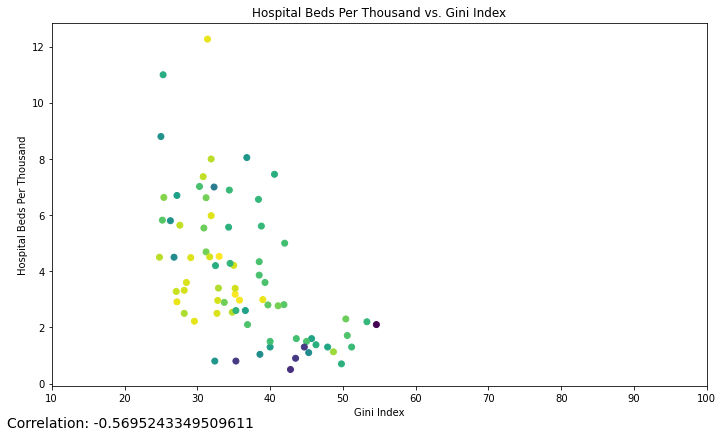

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(mergedf.gini, mergedf.hospital_beds_per_thousand, c=(mergedf.life_expectancy))
plt.title('Hospital Beds Per Thousand vs. Gini Index')
plt.xlabel('Gini Index')
plt.ylabel('Hospital Beds Per Thousand')
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
corr = mergedf.corr()['gini']['hospital_beds_per_thousand']
plt.figtext(0, 0, f'Correlation: {corr}', fontsize=14)
plt.tight_layout()